In [1]:
from sklearn.datasets import load_iris

In [2]:
# 붓꽃 데이터셋
# 3종의 붓꽃에 대해 꽃잎과 꽃받침의 길이와 너비를 특징으로 가진 데이터셋
# 분류 문제에서 많이 사용

iris = load_iris()
X_iris, y_iris = iris.data, iris.target

In [3]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.filename

'iris.csv'

In [8]:
y_iris.shape

(150,)

In [9]:
import numpy as np

iris_array = np.array(iris)

In [10]:
iris_array

array({'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],

In [11]:
import pandas as pd

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
iris_name = pd.DataFrame(y_iris)
iris_name

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [13]:
iris_name.rename(columns={'0' : 'iris_class'})

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
iris_pd1 = pd.concat([iris_pd, iris_name], axis=1)

In [15]:
setosa_feature = iris_pd1[:50]
versicolor_feature = iris_pd1[50:100]
virginica_feature = iris_pd1[100:]

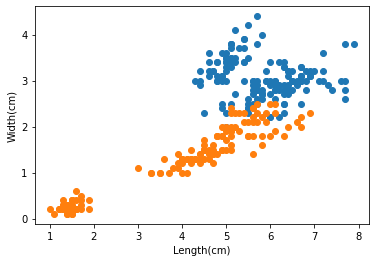

In [16]:
import matplotlib.pyplot as plt

# sepal = 꽃받침, petal = 꽃잎
sepal_length = iris_pd['sepal length (cm)']
sepal_width = iris_pd['sepal width (cm)']
petal_length = iris_pd['petal length (cm)']
petal_width = iris_pd['petal width (cm)']

# 전체 데이터 그래프
plt.scatter(sepal_length, sepal_width)
plt.scatter(petal_length, petal_width)
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

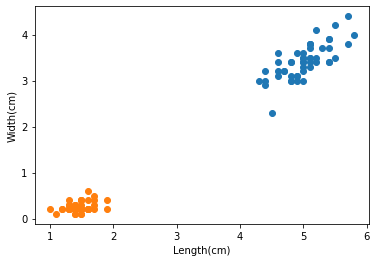

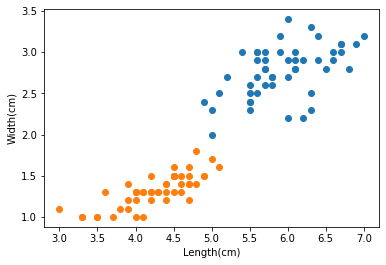

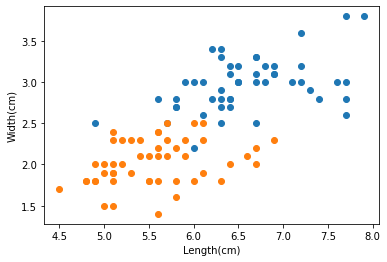

In [17]:
# iris 종류별 그래프
# setosa_feature = iris_pd1[:50]
plt.scatter(sepal_length[:50], sepal_width[:50])
plt.scatter(petal_length[:50], petal_width[:50])
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

# versicolor_feature = iris_pd1[50:100]
plt.scatter(sepal_length[50:100], sepal_width[50:100])
plt.scatter(petal_length[50:100], petal_width[50:100])
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

# virginica_feature = iris_pd1[100:]
plt.scatter(sepal_length[100:], sepal_width[100:])
plt.scatter(petal_length[100:], petal_width[100:])
plt.xlabel('Length(cm)')
plt.ylabel('Width(cm)')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 인스턴스 생성
kn = KNeighborsClassifier()

# 학습
kn.fit(X_iris, y_iris)

# 평가
kn.score(X_iris, y_iris)

0.9666666666666667

In [19]:
X_iris[0]

array([5.1, 3.5, 1.4, 0.2])

In [20]:
a = 0

for i in X_iris:
    print(a, 'class:', kn.predict([i]), 'feature:', X_iris[a])
    a += 1

0 class: [0] feature: [5.1 3.5 1.4 0.2]
1 class: [0] feature: [4.9 3.  1.4 0.2]
2 class: [0] feature: [4.7 3.2 1.3 0.2]
3 class: [0] feature: [4.6 3.1 1.5 0.2]
4 class: [0] feature: [5.  3.6 1.4 0.2]
5 class: [0] feature: [5.4 3.9 1.7 0.4]
6 class: [0] feature: [4.6 3.4 1.4 0.3]
7 class: [0] feature: [5.  3.4 1.5 0.2]
8 class: [0] feature: [4.4 2.9 1.4 0.2]
9 class: [0] feature: [4.9 3.1 1.5 0.1]
10 class: [0] feature: [5.4 3.7 1.5 0.2]
11 class: [0] feature: [4.8 3.4 1.6 0.2]
12 class: [0] feature: [4.8 3.  1.4 0.1]
13 class: [0] feature: [4.3 3.  1.1 0.1]
14 class: [0] feature: [5.8 4.  1.2 0.2]
15 class: [0] feature: [5.7 4.4 1.5 0.4]
16 class: [0] feature: [5.4 3.9 1.3 0.4]
17 class: [0] feature: [5.1 3.5 1.4 0.3]
18 class: [0] feature: [5.7 3.8 1.7 0.3]
19 class: [0] feature: [5.1 3.8 1.5 0.3]
20 class: [0] feature: [5.4 3.4 1.7 0.2]
21 class: [0] feature: [5.1 3.7 1.5 0.4]
22 class: [0] feature: [4.6 3.6 1.  0.2]
23 class: [0] feature: [5.1 3.3 1.7 0.5]
24 class: [0] feature: [4.

In [21]:
for n in range(1,20+1):
    # 모델 인스턴스 생성
    kn = KNeighborsClassifier(n_neighbors=n)
    # 학습
    kn.fit(X_iris, y_iris)
    # 평가
    print('이웃수:%d ' %n, kn.score(X_iris, y_iris))


이웃수:1  1.0
이웃수:2  0.98
이웃수:3  0.96
이웃수:4  0.96
이웃수:5  0.9666666666666667
이웃수:6  0.9733333333333334
이웃수:7  0.9733333333333334
이웃수:8  0.98
이웃수:9  0.98
이웃수:10  0.98
이웃수:11  0.9733333333333334
이웃수:12  0.98
이웃수:13  0.98
이웃수:14  0.98
이웃수:15  0.9866666666666667
이웃수:16  0.9866666666666667
이웃수:17  0.98
이웃수:18  0.9733333333333334
이웃수:19  0.98
이웃수:20  0.98


In [22]:
from sklearn.model_selection import train_test_split
X_train, y_train, X_target, y_target = train_test_split(X_iris, y_iris, random_state=42)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_target.shape)
print(y_target.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, X_target)
model.score(y_train, y_target)

1.0

In [25]:
model.predict([[10, 4, 2, 1]])

array([1])

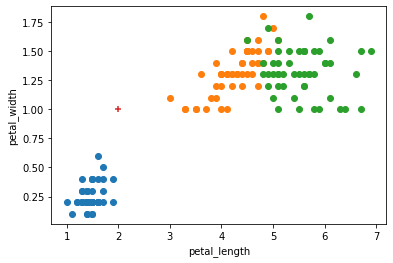

In [26]:
plt.scatter(petal_length[:50], petal_width[:50])
plt.scatter(petal_length[50:100], petal_width[50:100])
plt.scatter(petal_length[100:], petal_width[50:100])
plt.scatter(2, 1, marker='+')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [27]:
distances, indexes = model.kneighbors([[10, 4, 2, 1]])
print(distances)
print(indexes)

[[4.13400532 4.29883705 4.34971263 4.36806593 4.38634244]]
[[ 74  10 109  97   4]]


In [28]:
print(X_train[74])
print(X_train[10])
print(X_train[109])
print(X_train[97])
print(X_train[4])

[7.  3.2 4.7 1.4]
[6.6 3.  4.4 1.4]
[5.8 4.  1.2 0.2]
[6.9 3.1 4.9 1.5]
[6.7 3.1 4.7 1.5]


In [29]:
mean = np.mean(X_train, axis=0)  # feature column별 평균
std = np.std(X_train, axis=0)  # 표준편차
# print(mean, std)
X_train_scaled = (X_train - mean) / std
print(X_train_scaled)

[[-1.01827123  1.2864604  -1.39338902 -1.3621769 ]
 [-0.7730102   2.43545215 -1.33550342 -1.49647603]
 [-0.03722712 -0.78172474  0.74837808  0.92090833]
 [ 0.20803391  0.8268637   0.4010645   0.51801093]
 [ 1.06644751  0.13746866  0.51683569  0.3837118 ]
 [-0.52774918  1.97585545 -1.45127462 -1.09357864]
 [-0.52774918  1.51625875 -1.33550342 -1.3621769 ]
 [-0.40511866 -1.47111979 -0.06202028 -0.28778385]
 [ 0.57592545 -0.55192639  0.74837808  0.3837118 ]
 [ 0.69855596  0.13746866  0.97992047  0.7866092 ]
 [ 0.94381699 -0.09232969  0.3431789   0.24941267]
 [ 1.67960008  1.2864604   1.32723405  1.72670311]
 [-0.15985763 -0.32212804  0.2274077   0.11511354]
 [ 2.17012213 -0.09232969  1.61666204  1.18950659]
 [-0.28248815 -0.09232969  0.4010645   0.3837118 ]
 [-0.89564072  1.05666205 -1.39338902 -1.3621769 ]
 [ 2.29275265 -0.55192639  1.67454764  1.05520746]
 [-0.03722712 -0.78172474  0.16952211 -0.28778385]
 [-0.7730102   0.8268637  -1.39338902 -1.3621769 ]
 [-1.01827123  1.05666205 -1.45

In [30]:
y_scaled = (y_train - mean) / std
y_scaled

array([[ 0.33066442, -0.55192639,  0.51683569, -0.01918559],
       [-0.15985763,  1.7460571 , -1.21973223, -1.22787777],
       [ 2.29275265, -1.01152309,  1.79031883,  1.45810485],
       [ 0.20803391, -0.32212804,  0.4010645 ,  0.3837118 ],
       [ 1.18907802, -0.55192639,  0.57472129,  0.24941267],
       [-0.52774918,  0.8268637 , -1.33550342, -1.09357864],
       [-0.28248815, -0.32212804, -0.11990588,  0.11511354],
       [ 1.31170853,  0.13746866,  0.74837808,  1.45810485],
       [ 0.45329494, -1.93071649,  0.4010645 ,  0.3837118 ],
       [-0.03722712, -0.78172474,  0.05375091, -0.01918559],
       [ 0.82118648,  0.367267  ,  0.74837808,  1.05520746],
       [-1.26353226, -0.09232969, -1.39338902, -1.49647603],
       [-0.40511866,  1.05666205, -1.45127462, -1.3621769 ],
       [-1.14090175,  0.13746866, -1.33550342, -1.49647603],
       [-0.89564072,  1.7460571 , -1.33550342, -1.22787777],
       [ 0.57592545,  0.59706535,  0.51683569,  0.51801093],
       [ 0.82118648, -0.

In [31]:
model.fit(X_train_scaled, X_target)
model.score(y_scaled, y_target)

1.0

In [32]:
model.predict([[10, 4, 2, 1]])

array([2])

In [33]:
distances, indexes = model.kneighbors([[10, 4, 2, 1]])
print(distances)
print(indexes)

[[8.0431766  8.76420551 8.80755718 8.84516876 8.95715707]]
[[29 56 11 13 16]]


In [34]:
# 회귀모델 R^2
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, X_target)
knr.score(y_train, y_target)

0.9835594886922321

In [35]:
# 평균 절대값 오차 확인
from sklearn.metrics import mean_absolute_error

y_predict = knr.predict(y_train)
# print(y_predict)

mae = mean_absolute_error(y_target, y_predict)

print(mae)

0.036842105263157884


In [36]:
print(knr.score(X_train, X_target))  # 훈련데이터점수
print(knr.score(y_train, y_target))  # 테스트데이터점수

0.9588588220888943
0.9835594886922321


In [37]:
a = 1
# x = np.arange(50, 100).reshape(-1,1)

for k in range(75, 85):
    knr.n_neighbors = k
    knr.fit(X_train, X_target)
    X_score = knr.score(X_train, X_target)
    y_score = knr.score(y_train, y_target)
    print(f'{k}: {X_score} {y_score} {X_score-y_score}')
    a += 1

    # pred = knr.predict(x)

    # plt.scatter(X_train, X_target)
    # plt.plot(x, pred)
    # plt.show()


75: 0.6123001673401085 0.6158300884955753 -0.0035299211554667975
76: 0.603626783959635 0.6043251565491903 -0.0006983725895552961
77: 0.5955433860083392 0.5924596416493901 0.003083744358949092
78: 0.5841860337061475 0.5822991394808958 0.0018868942252516785
79: 0.5694250412402359 0.5676376144873791 0.0017874267528567023
80: 0.55562385208767 0.5536132620452312 0.0020105900424387535
81: 0.5414732845837953 0.5385353427039821 0.0029379418798132217
82: 0.5274495588702433 0.522665255791345 0.004784303078898211
83: 0.5110595851447173 0.5059266100903597 0.005132975054357614
84: 0.4975870761348905 0.49378005872949005 0.003807017405400459


In [38]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
# 다중 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, X_target)

print(lr.score(X_train, X_target))
print(lr.score(y_train, y_target))

0.9225512936540917
0.9487283360348983


In [40]:
print(lr.coef_)
print(lr.intercept_)

[-0.11548607 -0.05327186  0.26631062  0.52537257]
0.21023176385323017


In [41]:
lr.predict([[10, 4, 2, 1]])

array([-0.09972262])

In [42]:
# PolynomialFeatures 활용하기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
train_poly[:1]

array([[ 5.  ,  3.6 ,  1.4 ,  0.2 , 25.  , 18.  ,  7.  ,  1.  , 12.96,
         5.04,  0.72,  1.96,  0.28,  0.04]])

In [43]:
poly.transform([[2,3,4,5]])

array([[ 2.,  3.,  4.,  5.,  4.,  6.,  8., 10.,  9., 12., 15., 16., 20.,
        25.]])

In [44]:
test_poly = poly.transform(y_train)
test_poly[:1]

array([[ 6.1 ,  2.8 ,  4.7 ,  1.2 , 37.21, 17.08, 28.67,  7.32,  7.84,
        13.16,  3.36, 22.09,  5.64,  1.44]])

In [45]:
lr.fit(train_poly, X_target)
print(lr.score(train_poly, X_target))
print(lr.score(test_poly, y_target))

0.9486949445238945
0.9436486105118044


In [46]:
# degree 5로 설정
poly = PolynomialFeatures(degree=5, include_bias=False)

In [47]:
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[  2.   3.   4.   6.   9.   8.  12.  18.  27.  16.  24.  36.  54.  81.
   32.  48.  72. 108. 162. 243.]]


In [48]:
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(y_train)

In [49]:
lr.fit(train_poly, X_target)
print(lr.score(train_poly, X_target))
print(lr.score(test_poly, y_target))

1.0
-41.734086855090375


In [50]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [51]:
lr.fit(train_scaled, X_target)
print(lr.score(train_scaled, X_target))
print(lr.score(test_scaled, y_target))

1.0
-117.90500557442064


In [52]:
# 릿지회귀
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, X_target)
print(ridge.score(train_scaled, X_target))
print(ridge.score(test_scaled, y_target))

0.9517589408422866
0.9588399314594283


In [53]:
train_score = []
test_score = []

# 적용해볼 alpha 값 리스트
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:

    #릿지 모델 생성
    ridge = Ridge(alpha = a)

    #릿지 모델 훈련
    ridge.fit(train_scaled, X_target)

    #훈련점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, X_target))
    test_score.append(ridge.score(test_scaled, y_target))

print(train_score)
print(test_score)

[0.9659267026160556, 0.9619425684842152, 0.9567667453478894, 0.9517589408422866, 0.9431584145361445, 0.9129769826621972]
[0.9517193225782181, 0.9628862289715957, 0.9695441683375643, 0.9588399314594283, 0.9386357840232824, 0.9269446380219205]


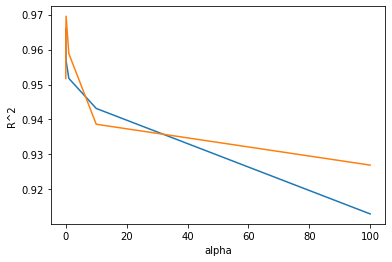

In [54]:
# 릿지회귀 그래프
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [55]:
print(alpha_list)
print(np.log10(alpha_list))

[0.001, 0.01, 0.1, 1, 10, 100]
[-3. -2. -1.  0.  1.  2.]


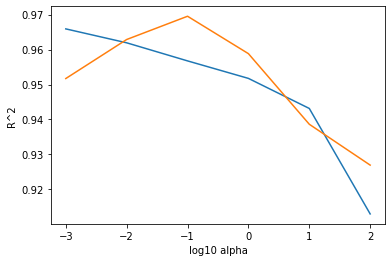

In [56]:
# 로그함수 적용하여 그래프 그리기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('log10 alpha')
plt.ylabel('R^2')
plt.show()


In [57]:
# 최적alpha값 설정
ridge = Ridge(alpha = 0.007)
ridge.fit(train_scaled, X_target)
print(ridge.score(train_scaled, X_target))
print(ridge.score(test_scaled, y_target))

0.9626155466919255
0.9621769967940201


In [58]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, X_target)
print(lasso.score(train_scaled, X_target))
print(lasso.score(test_scaled, y_target))

0.0
-0.015873329420263538


In [59]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:

    # 라쏘 모델을 생성 및 훈련
    lasso = Lasso(alpha = a, max_iter=1000)
    lasso.fit(train_scaled, X_target)

    train_score.append(lasso.score(train_scaled, X_target))
    test_score.append(lasso.score(test_scaled, y_target))

print(train_score)
print(test_score)



[0.9500843334209467, 0.9371172950590504, 0.9019825623918003, 0.0, 0.0, 0.0]
[0.9474451995863924, 0.9452250810518142, 0.9353986736133254, -0.015873329420263538, -0.015873329420263538, -0.015873329420263538]


c:\Users\CDL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.943e-02, tolerance: 7.292e-03
  model = cd_fast.enet_coordinate_descent(


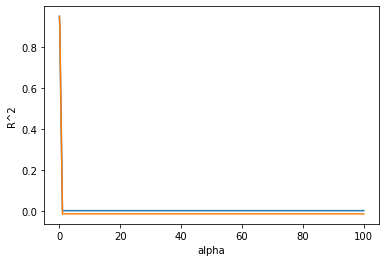

In [60]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

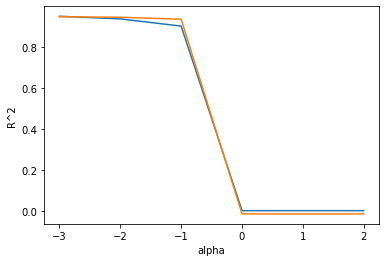

In [61]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [71]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, X_target)

print(dtc.score(X_train, X_target))
print(dtc.score(y_train, y_target))

1.0
1.0


In [63]:
# 특성 스케일 불필요
# dtc = DecisionTreeClassifier(random_state=42)
# dtc.fit(train_scaled, X_target)

# print(dtc.score(train_scaled, X_target))
# print(dtc.score(test_scaled, y_target))

1.0
1.0


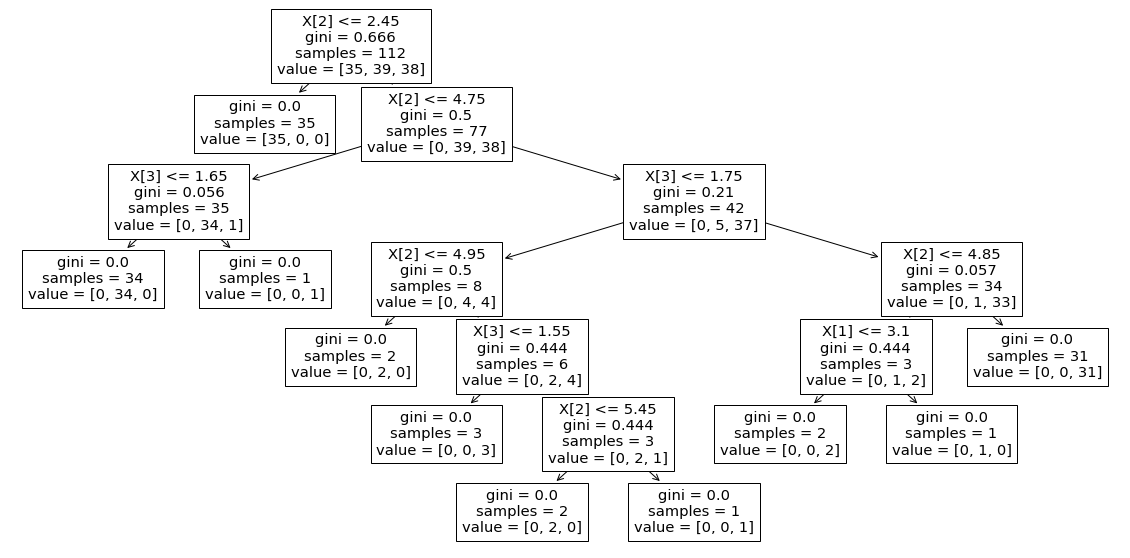

In [73]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtc)
plt.show()

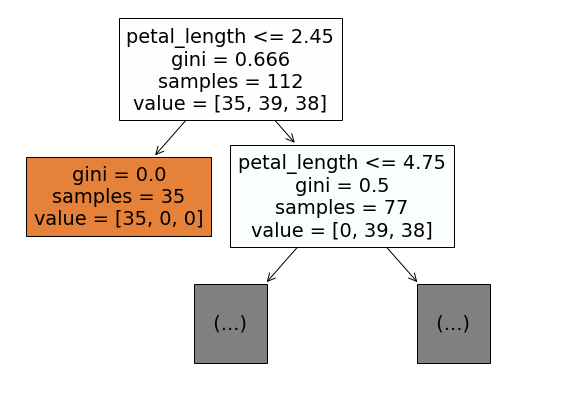

In [72]:
plt.figure(figsize=(10,7))
plot_tree(dtc, max_depth=1, filled=True, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [74]:
# 가지치기
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, X_target)

print(dtc.score(X_train, X_target))
print(dtc.score(y_train, y_target))

0.9553571428571429
1.0


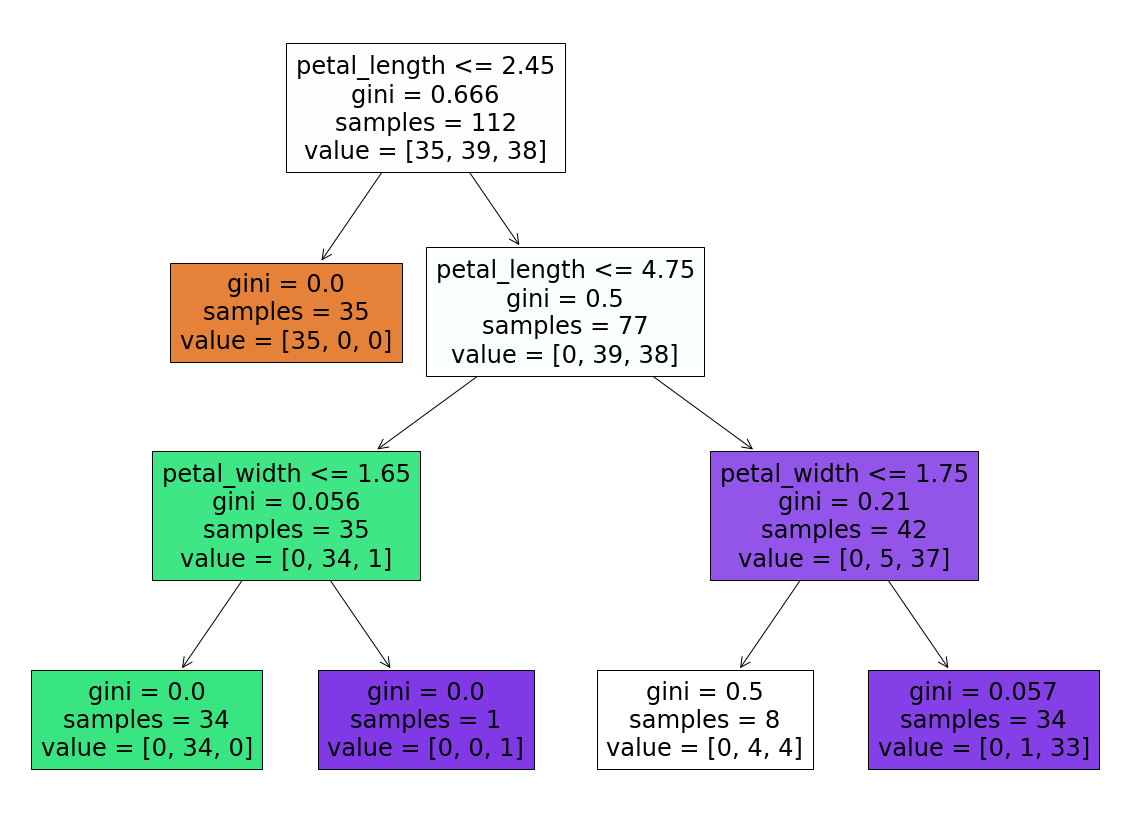

In [78]:
# 트리 구조 시각화

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [87]:
# 특성 중요도 확인 (sepal_length, sepal_width, petal_length, petal_width)
# print(dtc.feature_names_in_)
print(dtc.feature_importances_)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

In [92]:
# 최소 불순도로 가지치기
dtc = DecisionTreeClassifier(min_impurity_decrease=0.05, random_state=42)
dtc.fit(X_train, X_target)

print(dtc.score(X_train, X_target))
print(dtc.score(y_train, y_target))

0.9464285714285714
0.9736842105263158


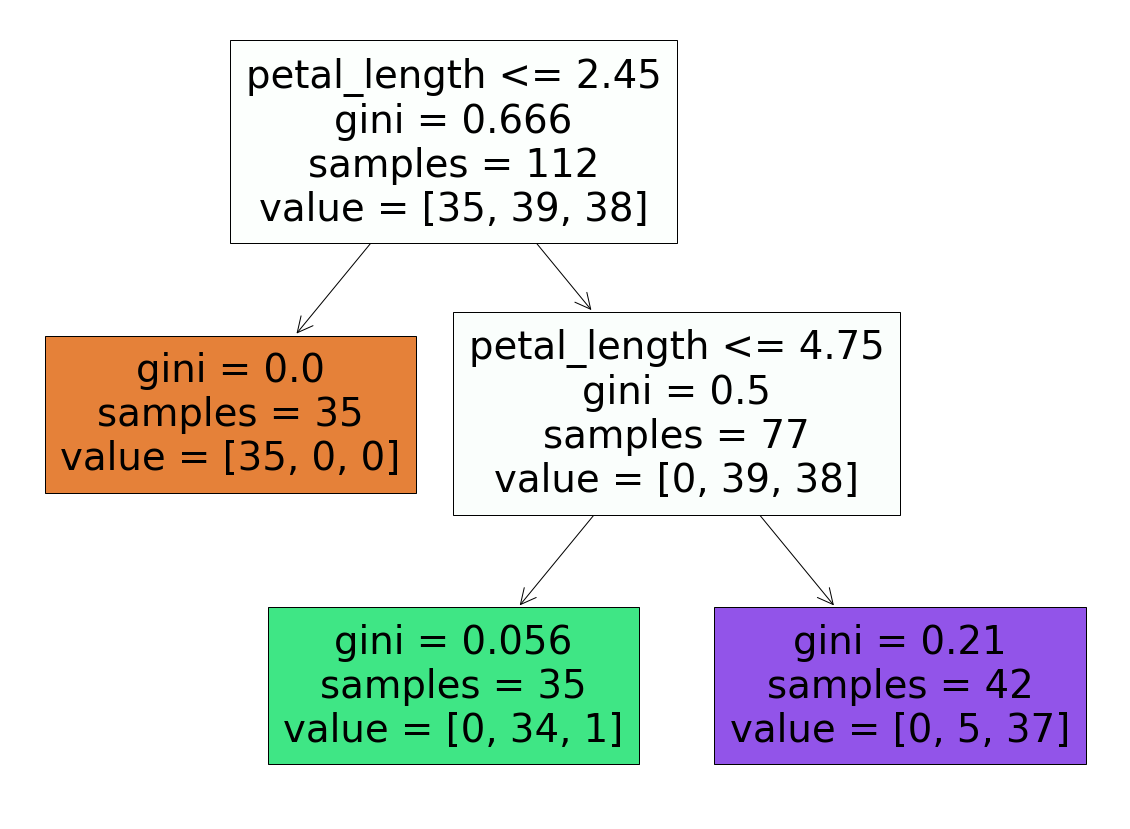

In [93]:
# 트리 시각화
plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()